# CS5228 Mini Project: Customer Segmentation & Churn Prediction

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## 1. Data Preprocessing

### 1a. Load & Inspect

In [21]:
train = pd.read_csv('churn-bigml-80.csv')
test = pd.read_csv('churn-bigml-20.csv')
train.info()

<class 'pandas.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   str    
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   str    
 4   Voice mail plan         2666 non-null   str    
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   float64
 15

In [22]:
train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [23]:
print(train['Churn'].value_counts())
print(train['International plan'].value_counts())
print(train['Voice mail plan'].value_counts())
print(train['Area code'].value_counts())
print(f"Unique states: {train['State'].nunique()}")

Churn
False    2278
True      388
Name: count, dtype: int64
International plan
No     2396
Yes     270
Name: count, dtype: int64
Voice mail plan
No     1933
Yes     733
Name: count, dtype: int64
Area code
415    1318
510     679
408     669
Name: count, dtype: int64
Unique states: 51


In [24]:
train.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

**Missing values:** No missing values detected across all 2666 training samples and all 20 features, no imputation or dropping required.

### 1b. Encode Categoricals

In [25]:
for df in [train, test]:
    df['Churn'] = df['Churn'].map({'True': 1, 'False': 0, True: 1, False: 0})
    df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
    df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [26]:
# Compute full pre-drop correlation matrix (all 18 numeric features) for use in EDA section 2c
pre_drop_num_cols = train.select_dtypes(include='number').columns.drop('Churn').tolist()
corr_full = train[pre_drop_num_cols].corr()

The following columns are dropped before modelling from a previous EDA pass:
- **4 charge columns** (`Total day/eve/night/intl charge`): deterministic linear transforms of their corresponding minutes columns (r = 1.000).
- **`Area code`**: no predictive signal (churn rate is uniform across all 3 codes).
- **`State`**: high cardinality (51 categories, ~52 samples per state on average) makes encoding impractical. Low sample count per category gives information that is potentially poorly balanced.
- **`Voice mail plan`**: near-perfectly correlated with `Number vmail messages` (r = 0.957); the continuous count is retained as it carries more granular information.

In [27]:
drop_cols = ['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge',
             'Area code', 'State', 'Voice mail plan']
for df in [train, test]:
    df.drop(columns=drop_cols, inplace=True)
print(list(train.columns))

['Account length', 'International plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total eve minutes', 'Total eve calls', 'Total night minutes', 'Total night calls', 'Total intl minutes', 'Total intl calls', 'Customer service calls', 'Churn']


### 1c. Normalize Numerical Features

Fit scaler on train only, transform both train and test.

In [28]:
num_cols = train.select_dtypes(include='number').columns.drop('Churn').tolist()
print(num_cols)

['Account length', 'International plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total eve minutes', 'Total eve calls', 'Total night minutes', 'Total night calls', 'Total intl minutes', 'Total intl calls', 'Customer service calls']


In [29]:
scaler = StandardScaler()
train_scaled = train.copy()
test_scaled = test.copy()

train_scaled[num_cols] = scaler.fit_transform(train[num_cols])
test_scaled[num_cols] = scaler.transform(test[num_cols])

## 2. Exploratory Data Analysis (Training Set)

### 2a. Class Balance

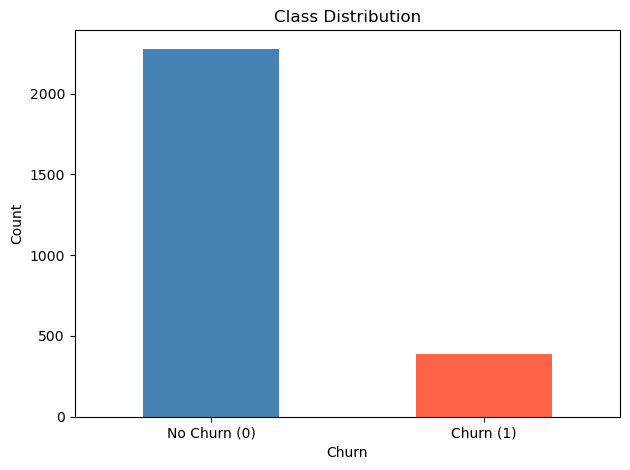

Churn
0    0.854464
1    0.145536
Name: count, dtype: float64


In [30]:
churn_counts = train['Churn'].value_counts()
churn_counts.plot(kind='bar', color=['steelblue', 'tomato'])
plt.xticks([0, 1], ['No Churn (0)', 'Churn (1)'], rotation=0)
plt.ylabel('Count')
plt.title('Class Distribution')
plt.tight_layout()
plt.show()
print(churn_counts / len(train))

**Interpretation:** The training set is heavily imbalanced, only 14.6% of customers churned. A naive model that predicts "no churn" for every customer would still achieve 85% accuracy, making accuracy a misleading standalone metric. In the supervised learning stage we will prioritise **precision, recall, and F1-score** as primary metrics, and handle the imbalance with sub/supersampling, synthetic oversampling or loss weight.

### 2b. Feature Distributions by Churn

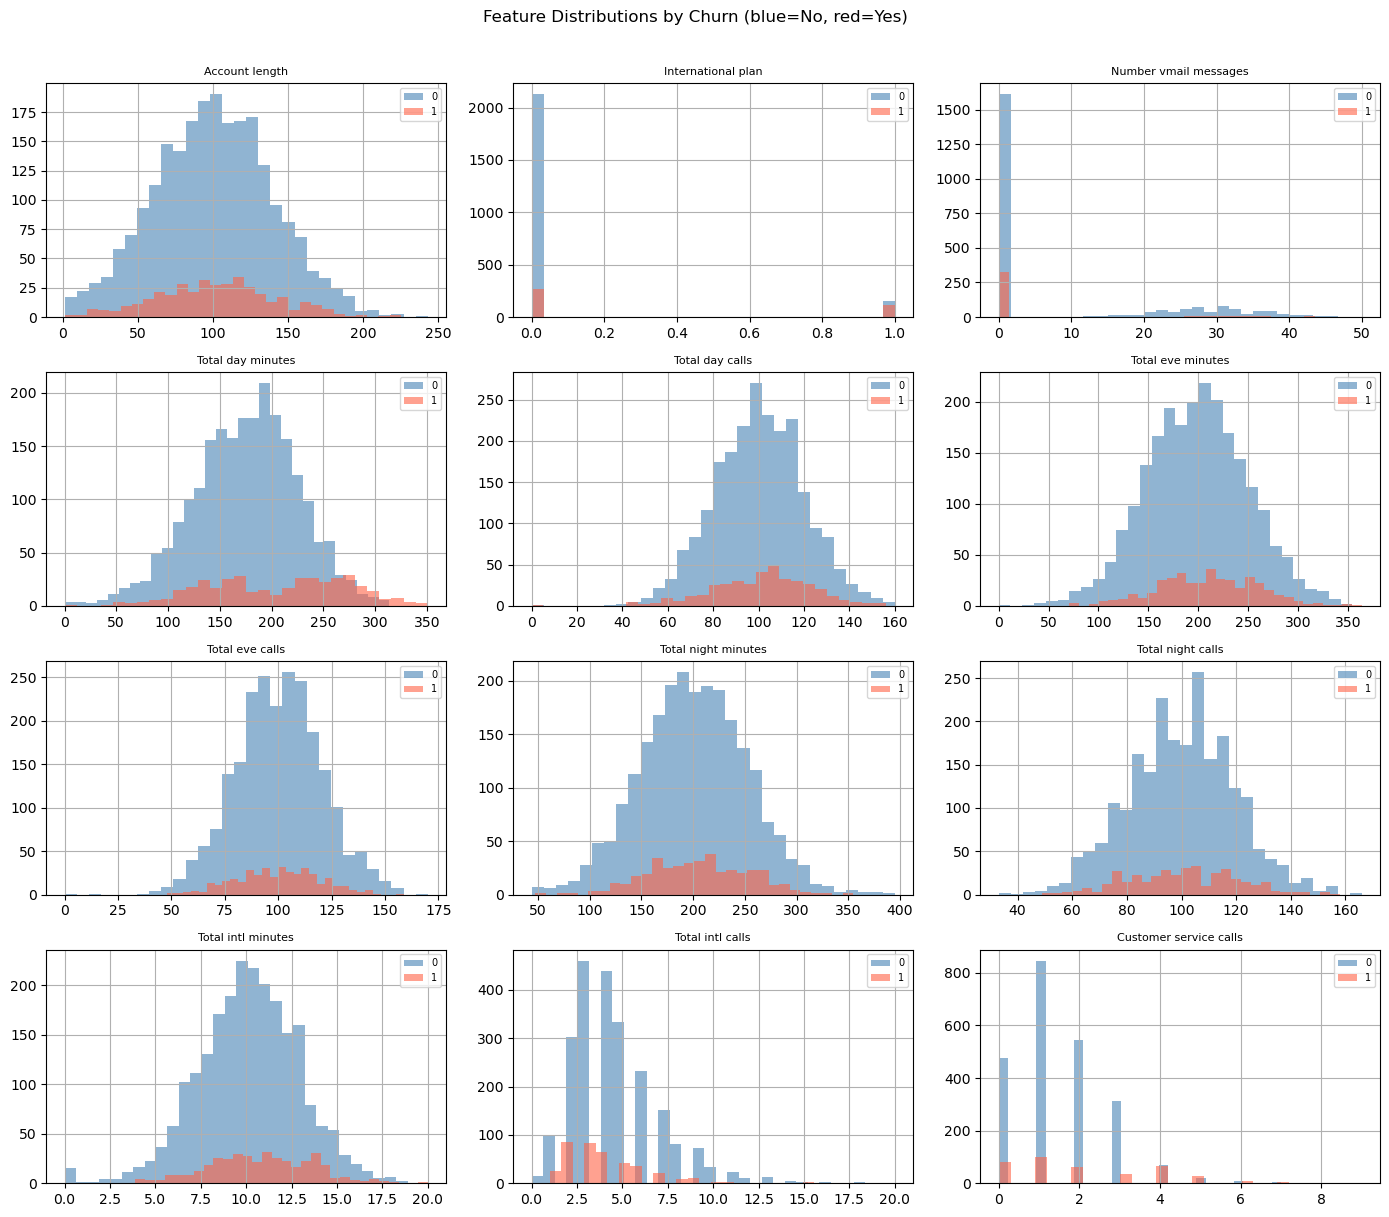

In [31]:
fig, axes = plt.subplots(4, 3, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    for label, color in [(0, 'steelblue'), (1, 'tomato')]:
        train[train['Churn'] == label][col].hist(ax=axes[i], alpha=0.6, color=color, bins=30, label=str(label))
    axes[i].set_title(col, fontsize=8)
    axes[i].legend(fontsize=7)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Feature Distributions by Churn (blue=No, red=Yes)', y=1.01)
plt.tight_layout()
plt.show()

**Interpretation:** Several features show meaningful distributional differences between churn (red) and non-churn (blue) groups:
- **Total day minutes:** The churn distribution is shifted noticeably right. Heavy daytime users are more likely to leave, possibly due to higher bills.
- **Customer service calls:** Churn customers cluster at higher values (3+), strongly suggesting that repeated service contact reflects unresolved dissatisfaction.
- **Number vmail messages:** Non-churn customers tend to have more voicemail messages, consistent with the negative correlation seen in Section 2d.
- **Total intl minutes:** A slight rightward shift for churn customers hints that high international usage may drive dissatisfaction, possibly tied to international plan pricing.

### 2c. Collinearity Analysis

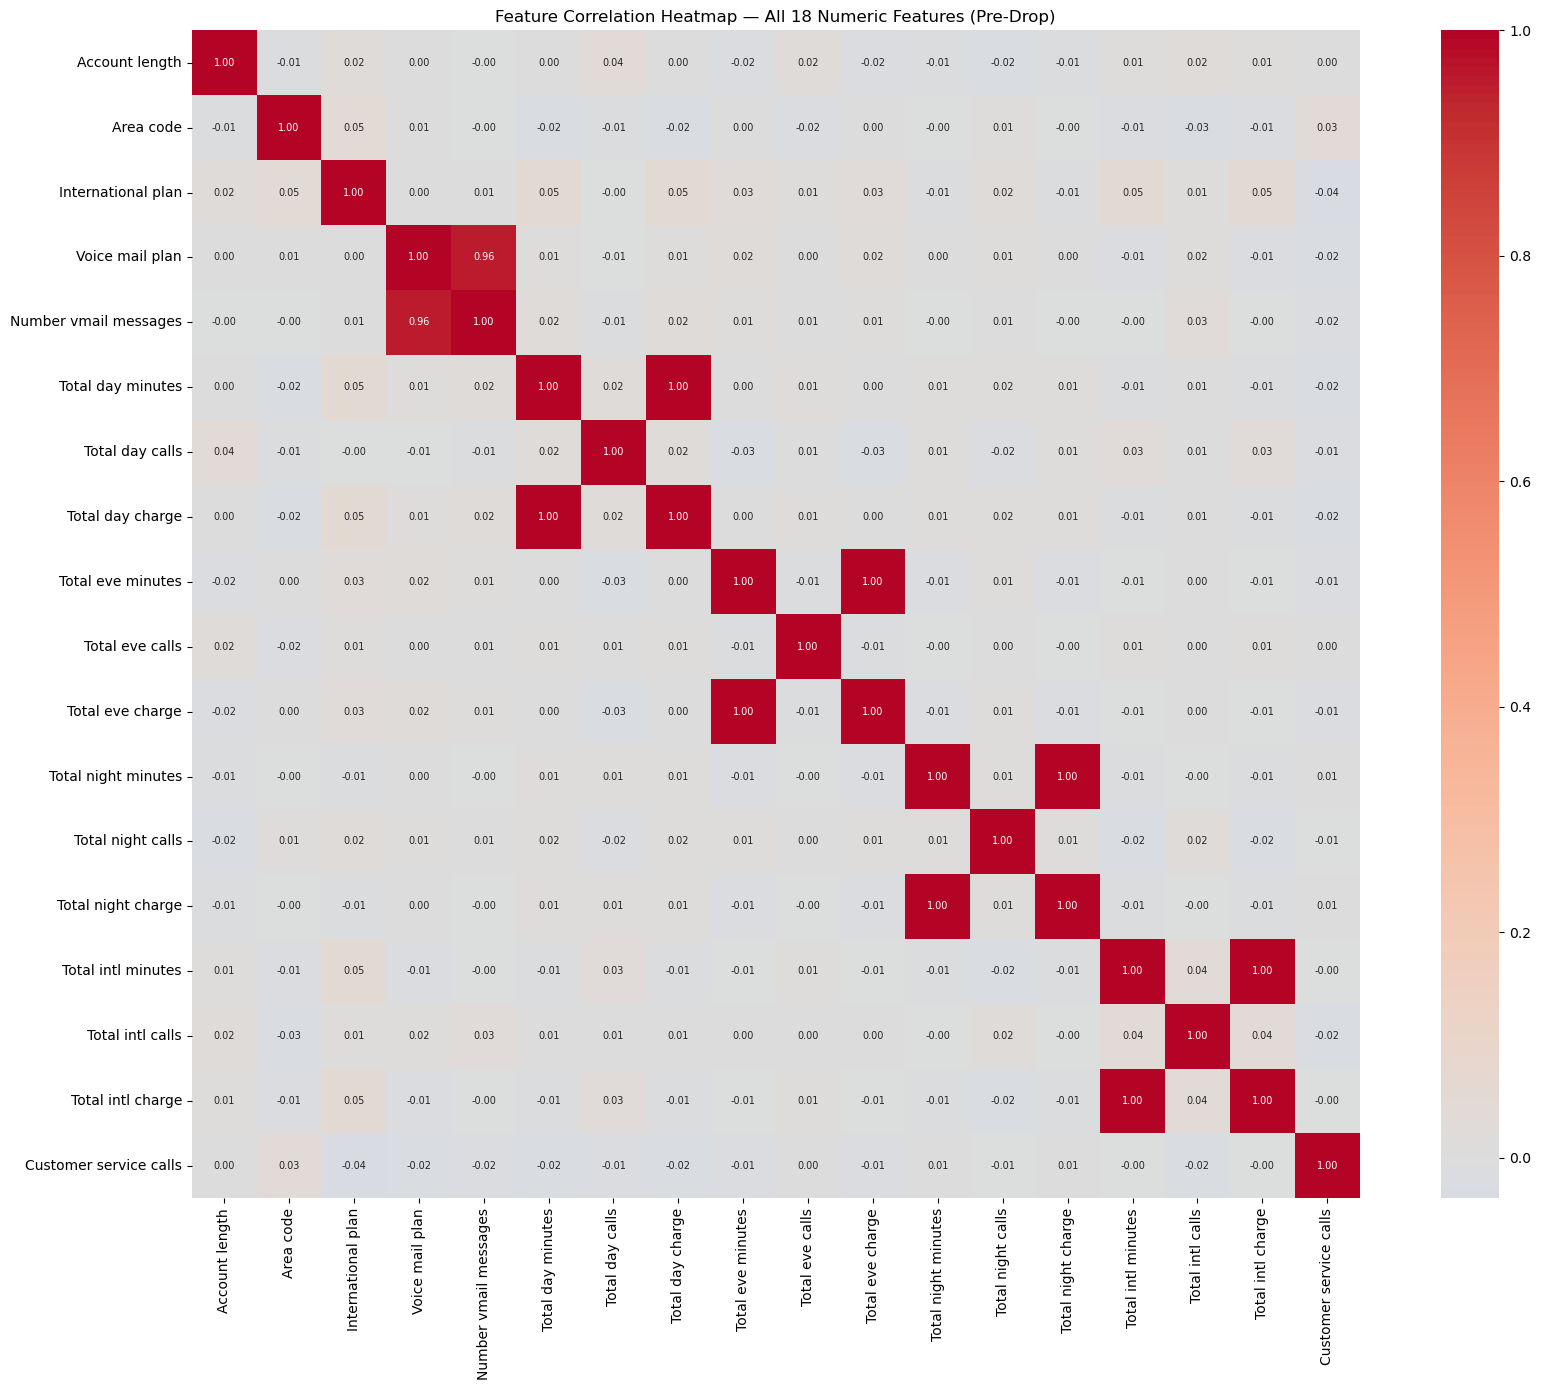

In [32]:
# Full pre-drop correlation matrix (18 numeric features, computed before dropping redundant columns)
plt.figure(figsize=(18, 14))
sns.heatmap(corr_full, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, annot_kws={'size': 7})
plt.title('Feature Correlation Heatmap — All 18 Numeric Features (Pre-Drop)')
plt.tight_layout()
plt.show()

**Interpretation (Pre-Drop):** The full heatmap covers all 18 numeric features from the original 19 (State is excluded as it is non-numeric and cannot appear in a Pearson correlation matrix). Two types of redundancy are visible:

1. **Perfect linear collinearity (r = 1.000):** Four minute/charge pairs are exact linear transforms of each other: `Total day minutes` and `Total day charge`, `Total eve minutes` and `Total eve charge`, `Total night minutes` and `Total night charge`, `Total intl minutes` and `Total intl charge`. Each charge is simply `minutes × fixed rate`, contributing zero independent information.

2. **Near-perfect correlation (r = 0.957):** `Voice mail plan` and `Number vmail messages`. Customers with a voicemail plan almost always have voicemail messages, binary plan indicator is almost entirely redundant with the count.

Outside these pairs, all other feature-to-feature correlations are |r| < 0.05, indicating the remaining features are largely orthogonal. Based on these findings, the 4 charge columns and `Voice mail plan` are dropped in preprocessing.

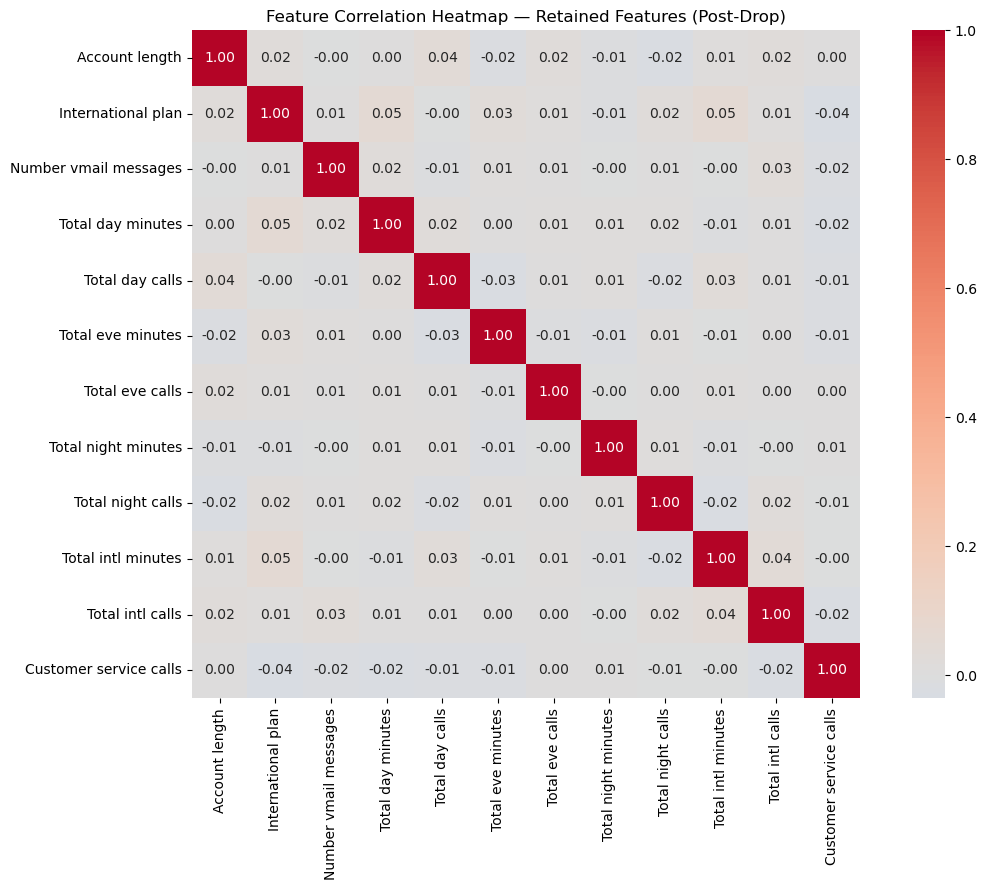

In [33]:
# Post-drop correlation matrix — confirms clean feature set
corr = train[num_cols].corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Feature Correlation Heatmap — Retained Features (Post-Drop)')
plt.tight_layout()
plt.show()

**Interpretation (Post-Drop):** After removing all redundant features, the correlation matrix confirms that the retained 12 features are largely independent. Almost all pairwise correlations are |r| < 0.05. No significant collinearity remains, giving confidence that each retained feature contributes independent signal to the models.

### 2d. Feature-vs-Churn Correlations

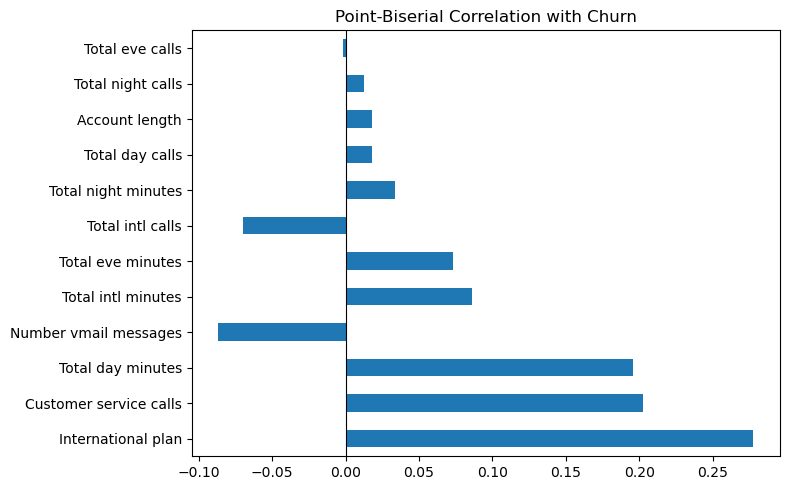

International plan        0.277489
Customer service calls    0.202590
Total day minutes         0.195688
Number vmail messages    -0.086474
Total intl minutes        0.086204
Total eve minutes         0.072906
Total intl calls         -0.069882
Total night minutes       0.033639
Total day calls           0.018290
Account length            0.017728
Total night calls         0.012262
Total eve calls          -0.001539
dtype: float64


In [34]:
from scipy.stats import pointbiserialr

correlations = {}
for col in num_cols:
    r, _ = pointbiserialr(train['Churn'], train[col])
    correlations[col] = r

corr_series = pd.Series(correlations).sort_values(key=abs, ascending=False)
corr_series.plot(kind='barh', figsize=(8, 5))
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Point-Biserial Correlation with Churn')
plt.tight_layout()
plt.show()
print(corr_series)

**Interpretation:** Ranking features by absolute point-biserial correlation with churn identifies the strongest individual predictors:

- **Top 3 predictive features:** `International plan` (r = 0.277), `Customer service calls` (r = 0.203), and `Total day minutes` (r = 0.196). These provide the clearest signal for distinguishing churners from non-churners.
- **Moderate signal:** `Number vmail messages` (r ≈ −0.086), `Total intl minutes` (r ≈ 0.086), `Total eve minutes` (r ≈ 0.073), and `Total intl calls` (r ≈ −0.070) show small but non-negligible associations with churn.
- **Near-zero features:** Call count columns (`Total day/eve/night calls`) and `Account length` carry essentially no linear signal for churn prediction.

In [35]:
top3 = corr_series.abs().nlargest(3).index.tolist()
print(f"Top 3 features: {top3}")
print()
print(corr_series.abs().nlargest(3).round(3))

Top 3 features: ['International plan', 'Customer service calls', 'Total day minutes']

International plan        0.277
Customer service calls    0.203
Total day minutes         0.196
dtype: float64


**Top features summary:** The two most discriminative features are `International plan` and `Customer service calls`, capturing plan-based dissatisfaction and service friction respectively. Adding `Total day minutes` as the third feature introduces a usage-volume dimension. High daytime usage correlates with higher bills and greater churn risk.

### 2e. Customer Service Calls — Churn Rate by Count

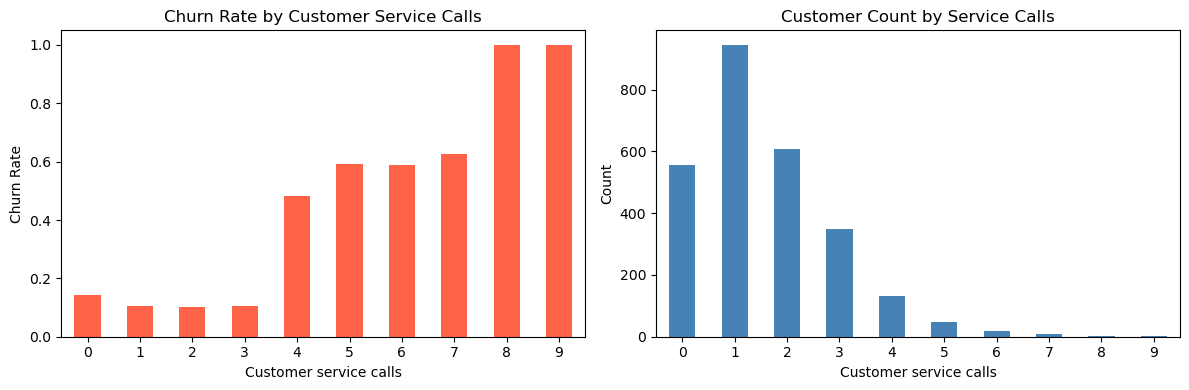

Customer service calls
0    0.142
1    0.105
2    0.102
3    0.106
4    0.481
5    0.592
6    0.588
7    0.625
8    1.000
9    1.000
Name: Churn, dtype: float64


In [36]:
cs_churn = train.groupby('Customer service calls')['Churn'].mean()
cs_counts = train['Customer service calls'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

cs_churn.plot(kind='bar', ax=axes[0], color='tomato')
axes[0].set_title('Churn Rate by Customer Service Calls')
axes[0].set_ylabel('Churn Rate')
axes[0].tick_params(axis='x', rotation=0)

cs_counts.plot(kind='bar', ax=axes[1], color='steelblue')
axes[1].set_title('Customer Count by Service Calls')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()
print(cs_churn.round(3))

**Interpretation:** Customer service calls reveals a threshold effect: churn rate rises steeply and non-linearly with the number of calls made. Customers who called **4 or more times** show dramatically elevated churn rates, suggesting a tipping point beyond which unresolved issues become a decisive reason to leave. This non-linear pattern means linear models may underweight this feature.

### 2f. Categorical Feature Breakdown

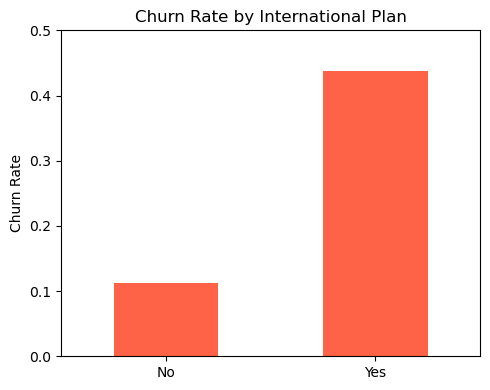

In [37]:
churn_rate = train.groupby('International plan')['Churn'].mean()
churn_rate.index = ['No', 'Yes']
churn_rate.plot(kind='bar', color='tomato', figsize=(5, 4))
plt.title('Churn Rate by International Plan')
plt.ylabel('Churn Rate')
plt.ylim(0, 0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Interpretation:**
- **International plan** has a dramatic effect: customers with the plan churn at ~44% vs ~11% without, nearly **4x higher**. This is the single strongest categorical predictor of churn in the dataset, likely reflecting pricing dissatisfaction among heavy international callers.
- **Voice mail plan** (dropped due to redundancy with `Number vmail messages`): pre-drop analysis showed customers without a voicemail plan churned at ~17% vs ~8% with one, a meaningful protective effect captured by the retained `Number vmail messages` feature.
- **Area code** (dropped): showed essentially uniform churn rates across all three codes (~14%), confirming it carries no predictive signal.